In [1]:
from slsim.ParamDistributions.kext_gext_distributions import LineOfSightDistribution

In [2]:

distribution_reader1 = LineOfSightDistribution()
gamma1, kappa1 = distribution_reader1.get_kappa_gamma(1.01020000, 0.512000000)

distribution_reader2 = LineOfSightDistribution()  # This will not reload the data
gamma2, kappa2 = distribution_reader2.get_kappa_gamma(1.2, 0.6)

print(gamma1, kappa1)
print(gamma2, kappa2)

1.0 0.5
1.2 0.6
0.017152928447206468 -0.011765951151722114
0.029570200030693338 -0.015476628951236842


In [3]:
import h5py
import re

def format_key_name(key):
    # 匹配 'zs_xxxx_zd_xxxx' 模式，并格式化浮点数为两位小数
    return re.sub(r'zs_(\d+\.\d+)_zd_(\d+\.\d+)', lambda m: "zs_{:.1f}_zd_{:.1f}".format(float(m.group(1)), float(m.group(2))), key)

# 打开HDF5文件
with h5py.File('/Users/tz/Documents/GitHub/slsim/data/glass/no_nonlinear_distributions.h5', 'r+') as file:
    # 记录需要更改的键
    keys_to_update = {}

    # 遍历文件中的所有键
    for key in file.keys():
        if re.match(r'zs_\d+\.\d+_zd_\d+\.\d+', key):
            new_key = format_key_name(key)
            if new_key != key:
                keys_to_update[key] = new_key

    # 更新键
    for old_key, new_key in keys_to_update.items():
        data = file[old_key][...]  # 读取原始数据
        del file[old_key]          # 删除原始键
        file[new_key] = data       # 创建新键并保存数据



In [13]:
import h5py
# Opening the HDF5 file and reading its contents
data_content = {}
file_path = '/Users/tz/Documents/GitHub/slsim/data/glass/no_nonlinear_distributions.h5'
#file_path = '/Users/tz/Documents/GitHub/slsim/data/glass/joint_distributions.h5'
revised_data_content = {}

with h5py.File(file_path, 'r') as file:
    # Iterating through items at the root level and checking if they are groups or datasets
    for item_name, item in file.items():
        if isinstance(item, h5py.Group):
            # Process group
            group_datasets = {}
            for dataset_name, dataset in item.items():
                group_datasets[dataset_name] = dataset[:]  # Read the full dataset
            revised_data_content[item_name] = group_datasets
        elif isinstance(item, h5py.Dataset):
            # Process dataset
            revised_data_content[item_name] = item[:]  # Read the full dataset

print(revised_data_content.keys())


dict_keys(['zs_0.1', 'zs_0.2', 'zs_0.3', 'zs_0.4', 'zs_0.5', 'zs_0.6', 'zs_0.7', 'zs_0.8', 'zs_0.9', 'zs_1.0', 'zs_1.1', 'zs_1.2', 'zs_1.3', 'zs_1.4', 'zs_1.5', 'zs_1.6', 'zs_1.7', 'zs_1.8', 'zs_1.9', 'zs_2.0', 'zs_2.1', 'zs_2.2', 'zs_2.3', 'zs_2.4', 'zs_2.5', 'zs_2.6', 'zs_2.7', 'zs_2.8', 'zs_2.9', 'zs_3.0', 'zs_3.1', 'zs_3.2', 'zs_3.3', 'zs_3.4', 'zs_3.5', 'zs_3.6', 'zs_3.7', 'zs_3.8', 'zs_3.9', 'zs_4.0', 'zs_4.1', 'zs_4.2', 'zs_4.3', 'zs_4.4', 'zs_4.5', 'zs_4.6', 'zs_4.7', 'zs_4.8', 'zs_4.9'])


In [14]:

with h5py.File(file_path, 'r') as file:
    zs_2_9_values = file['zs_2.9'][:]  # Reading the entire content of the dataset 'zs_2.9'
      #zs_2_9_zd_05_values = file['zs_2.9_zd_0.5'][:]  # Reading the entire content of the dataset 'zs_2.9'

zs_2_9_values
#zs_2_9_zd_05_values

array([[ 0.00822461,  0.03951351],
       [ 0.00828383,  0.04350715],
       [ 0.07319009,  0.01924536],
       ...,
       [-0.03503605,  0.01604689],
       [-0.03589181,  0.04733618],
       [-0.0590289 ,  0.01378421]])

In [12]:
import h5py
import re

def format_key_name(key):
    return re.sub(r'zs_(\d+\.\d+)', lambda m: "zs_{:.1f}".format(float(m.group(1))), key)

file_path = '/Users/tz/Documents/GitHub/slsim/data/glass/no_nonlinear_distributions.h5'
with h5py.File(file_path, 'r+') as file:
    keys_to_update = {}

    for key in file.keys():
        if re.match(r'zs_\d+\.\d+', key):
            new_key = format_key_name(key)
            if new_key != key:
                keys_to_update[key] = new_key

    for old_key, new_key in keys_to_update.items():
        data = file[old_key][...]  
        del file[old_key]         
        file[new_key] = data      


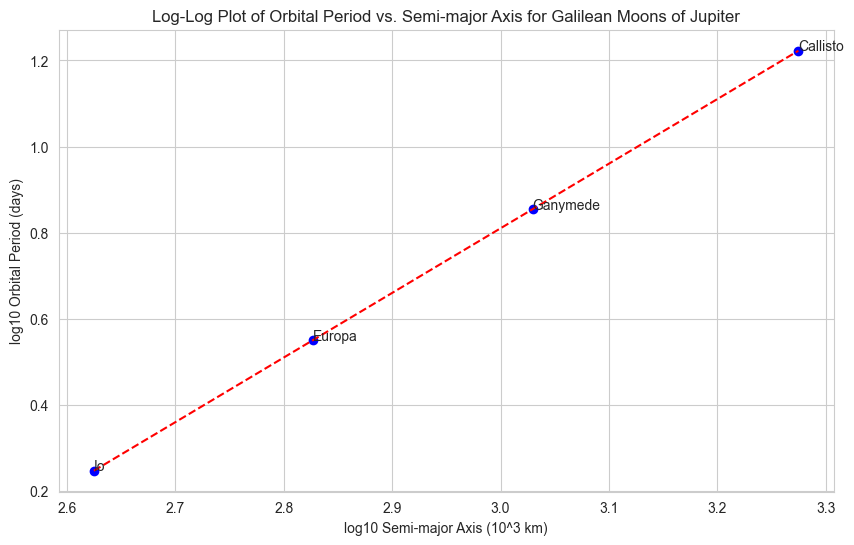

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image provided, for the Galilean moons of Jupiter
# Orbital Period (P) in days and Semi-major Axis (a) in 10^3 km
moons_data = {
    "Io": {"P": 1.769, "a": 421.6},
    "Europa": {"P": 3.551, "a": 670.9},
    "Ganymede": {"P": 7.155, "a": 1070.4},
    "Callisto": {"P": 16.689, "a": 1882.7}
}

# Calculate log10 for both the orbital period and the semi-major axis
for moon, data in moons_data.items():
    data['log_P'] = np.log10(data['P'])
    data['log_a'] = np.log10(data['a'])

# Extract the log values for plotting
log_P_values = [data['log_P'] for data in moons_data.values()]
log_a_values = [data['log_a'] for data in moons_data.values()]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(log_a_values, log_P_values, color='blue')

# Annotating the points
for moon, data in moons_data.items():
    plt.text(data['log_a'], data['log_P'], moon)

# Creating a linear fit
a, b = np.polyfit(log_a_values, log_P_values, 1)
x_fit = np.linspace(min(log_a_values), max(log_a_values), 100)
y_fit = a * x_fit + b

# Plot the linear fit
plt.plot(x_fit, y_fit, color='red', linestyle='--')

# Labeling the axes
plt.xlabel('log10 Semi-major Axis (10^3 km)')
plt.ylabel('log10 Orbital Period (days)')

# Title for the graph
plt.title('Log-Log Plot of Orbital Period vs. Semi-major Axis for Galilean Moons of Jupiter')

# Show grid
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
print(a,b)